### Taranaki Regional Council: Environmental Data
Taranaki Regional Council make available a variety of environmental data through their website: https://www.trc.govt.nz/environment/maps-and-data/regional-overview
From within each site various data is collected for example
<ul><li>wind (direction, speed, gust)</li> <li>rainfall</li> <li>river (flow, height, dissolved O2, temperature)</li> <li>soil (moisture, temperature)</li></ul>
Data is available for<ul><li>365 days (daily record)</li> <li>30 days (hourly record)</li><li>7 days (10 minute record)</li></ul>
It is possible to set a starting from date to compile historical data sets from the regional council website.
Although inspecting a data type for a site may offer up a related data type, this is restricted to what is set in the website.
<br><br>
The following code demonstrates the possibility of extracting raw data and inspecting a chosen data type against any other data type available within a site, but also comparing similar data types across multiple sites concurrently.

<Axes: ylabel='Frequency'>

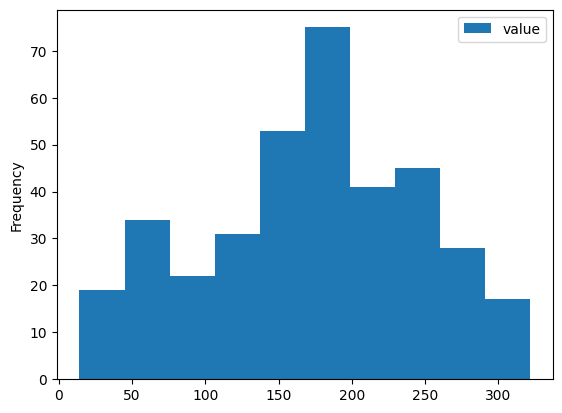

In [10]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import requests
import json
import sys, os
sys.path.insert(0, os.path.abspath(".."))

from src.TRCSampleDF import sites_dataframe, measures_dataframe

# Define url parts for accessing TRC Environmental Data
base_url = "https://www.trc.govt.nz/environment/maps-and-data/site-details/LoadGraphAndListData/"
site_link = "?siteID="
measure_link = "&measureID="
time_link = "&timePeriod="
date_link = "&fromDate="

# Set up dataframes with the id codes that are passed into the url when building the master data dataframe
df_sites = sites_dataframe()
df_measures = measures_dataframe()

timelink = {
    "id": [1, 2, 3],
    "label": ["7days", "30days", "365days"]
}
df_timelink = pd.DataFrame(timelink)

test_link = base_url + site_link + "8" + measure_link + "4" + time_link + "365days"

try:
    response = requests.get(test_link)
    response.raise_for_status()

    response_data_string = response.text
    data = json.loads(response_data_string)
    raw_data = data.get('highStockData')
       
    if raw_data:
        df_data = pd.DataFrame(raw_data, columns=['timestamp', 'value'])
        df_data['timestamp'] = pd.to_datetime(df_data['timestamp'], unit='ms')
        df_data['year'] = pd.DatetimeIndex(df_data['timestamp']).year
        df_data['month'] = pd.DatetimeIndex(df_data['timestamp']).month
        df_data['mm-yyyy'] = df_data['timestamp'].apply(lambda x: x.strftime('%B-%y'))
    
except: pass

df_data.plot(kind = 'hist', x = 'timestamp', y = 'value')

